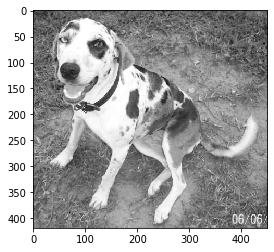

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/rumi/Desktop/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [6]:
print(img_array)

[[ 31  52  85 ... 123 118 112]
 [ 54  62  77 ... 113 110 107]
 [ 61  64  72 ... 108 107 108]
 ...
 [140 142 145 ... 136 125 127]
 [140 142 145 ... 133 122 125]
 [140 142 146 ... 130 119 121]]


In [7]:
print(img_array.shape)


(419, 451)


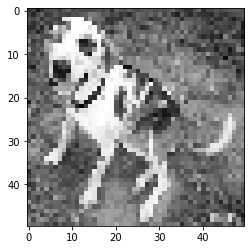

In [8]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


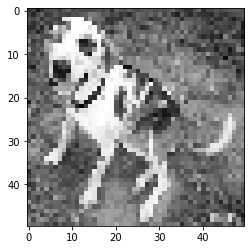

In [9]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [08:06<00:00, 25.70it/s]

24946


In [11]:
import random

random.shuffle(training_data)


In [12]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
0
0
1
1


In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 23]
   [ 29]
   [ 47]
   ...
   [ 94]
   [ 81]
   [ 78]]

  [[ 22]
   [ 19]
   [ 18]
   ...
   [ 84]
   [ 83]
   [ 76]]

  [[ 16]
   [ 14]
   [ 15]
   ...
   [ 98]
   [ 89]
   [ 83]]

  ...

  [[130]
   [135]
   [137]
   ...
   [129]
   [140]
   [124]]

  [[124]
   [135]
   [133]
   ...
   [138]
   [138]
   [120]]

  [[120]
   [134]
   [126]
   ...
   [122]
   [128]
   [115]]]]
